#### Simple CNN model for CIFAR-10


In [23]:
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Input, BatchNormalization
from keras.constraints import maxnorm
from keras.models import Model
from keras.optimizers import SGD, Adam
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.common.image_dim_ordering()

'tf'

##### Fixing random seed for reproducibility

In [0]:
seed = 7
numpy.random.seed(seed)

##### Loading the data

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Normalizing inputs from 0-255 to 0.0-1.0

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
yp=y_test

Onehot encode outputs

In [0]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

Create the model

In [0]:
model = Sequential()
model.add(Conv2D(128, (3, 3), input_shape=(X_train.shape[1:]), padding='same', activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

Compile the model

In [0]:
epochs = 70
lrate = 0.001
decay = lrate/epochs
sgd = Adam(lr=lrate)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [30]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 128)       3584      
_________________________________________________________________
dropout_10 (Dropout)         (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 256)       295168    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 256)       0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 16, 16, 256)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 65536)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)              

Fit the model

In [31]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)

Train on 50000 samples, validate on 10000 samples
Epoch 1/70
50000/50000 [==============================] - 52s 1ms/step - loss: 1.7218 - accuracy: 0.3730 - val_loss: 1.3226 - val_accuracy: 0.5221
Epoch 2/70
50000/50000 [==============================] - 45s 902us/step - loss: 1.3296 - accuracy: 0.5241 - val_loss: 1.1776 - val_accuracy: 0.5795
Epoch 3/70
50000/50000 [==============================] - 45s 901us/step - loss: 1.2075 - accuracy: 0.5685 - val_loss: 1.0956 - val_accuracy: 0.6090
Epoch 4/70
50000/50000 [==============================] - 45s 903us/step - loss: 1.1141 - accuracy: 0.6038 - val_loss: 1.0502 - val_accuracy: 0.6351
Epoch 5/70
50000/50000 [==============================] - 45s 903us/step - loss: 1.0454 - accuracy: 0.6309 - val_loss: 0.9745 - val_accuracy: 0.6558
Epoch 6/70
50000/50000 [==============================] - 45s 903us/step - loss: 0.9806 - accuracy: 0.6505 - val_loss: 0.9337 - val_accuracy: 0.6723
Epoch 7/70
50000/50000 [==============================] - 

Final evaluation of the model

In [32]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 74.05%


1. Performance Change

In [0]:
m1 = Sequential()
m1.add(Conv2D(32, (3, 3), input_shape=(X_train.shape[1:]), padding='same', activation='relu'))
m1.add(Dropout(0.2))
m1.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
m1.add(MaxPooling2D(pool_size=(2, 2)))
m1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
m1.add(Dropout(0.2))
m1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
m1.add(MaxPooling2D(pool_size=(2, 2)))
m1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
m1.add(Dropout(0.2))
m1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
m1.add(MaxPooling2D(pool_size=(2, 2)))
m1.add(Flatten())
m1.add(Dropout(0.2))
m1.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
m1.add(Dropout(0.2))
m1.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
m1.add(Dropout(0.2))
m1.add(Dense(num_classes, activation='softmax'))

In [0]:
epochs = 20
lrate = 0.001
decay = lrate/epochs
sgd = Adam(lr=lrate)
m1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [35]:
print(m1.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_13 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_14 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)       

In [36]:
m1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 12s 241us/step - loss: 1.7234 - accuracy: 0.3570 - val_loss: 1.4441 - val_accuracy: 0.4725
Epoch 2/20
50000/50000 [==============================] - 11s 225us/step - loss: 1.2380 - accuracy: 0.5524 - val_loss: 1.1587 - val_accuracy: 0.5893
Epoch 3/20
50000/50000 [==============================] - 11s 225us/step - loss: 1.0136 - accuracy: 0.6379 - val_loss: 0.9658 - val_accuracy: 0.6580
Epoch 4/20
50000/50000 [==============================] - 11s 224us/step - loss: 0.8626 - accuracy: 0.6937 - val_loss: 0.8180 - val_accuracy: 0.7162
Epoch 5/20
50000/50000 [==============================] - 11s 225us/step - loss: 0.7670 - accuracy: 0.7297 - val_loss: 0.7602 - val_accuracy: 0.7334
Epoch 6/20
50000/50000 [==============================] - 11s 224us/step - loss: 0.6921 - accuracy: 0.7567 - val_loss: 0.7030 - val_accuracy: 0.7601
Epoch 7/20
50000/50000 [==============================] 

In [37]:
scores = m1.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 79.84%


2. Model to Keras API Model

In [38]:
print(X_train.shape[1:])

(32, 32, 3)


In [40]:
from keras.models import Model
from keras.layers import Input

visible = Input(shape=(32,32,3))
x=Conv2D(32,(3,3),padding="same",activation='relu')(visible)
x=Dropout(0.2)(x)
x=Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x=MaxPooling2D(pool_size=(2, 2))(x)
x=Dropout(0.5)(x)
x=Flatten()(x)
x=Dense(512, activation='relu', kernel_constraint=maxnorm(3))(x)
x=Dropout(0.3)(x)
x=Dense(num_classes, activation='softmax')(x)
m2 = Model(inputs=visible,output=x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [0]:
epochs = 20
lrate = 0.001
decay = lrate/epochs
sgd = Adam(lr=lrate)
m2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [42]:
m2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 34s 674us/step - loss: 1.6484 - accuracy: 0.4142 - val_loss: 1.2829 - val_accuracy: 0.5488
Epoch 2/20
50000/50000 [==============================] - 33s 664us/step - loss: 1.2221 - accuracy: 0.5666 - val_loss: 1.0723 - val_accuracy: 0.6277
Epoch 3/20
50000/50000 [==============================] - 33s 662us/step - loss: 1.0823 - accuracy: 0.6153 - val_loss: 1.0143 - val_accuracy: 0.6501
Epoch 4/20
50000/50000 [==============================] - 33s 664us/step - loss: 0.9961 - accuracy: 0.6476 - val_loss: 0.9583 - val_accuracy: 0.6685
Epoch 5/20
50000/50000 [==============================] - 33s 663us/step - loss: 0.9401 - accuracy: 0.6681 - val_loss: 0.9766 - val_accuracy: 0.6556
Epoch 6/20
50000/50000 [==============================] - 33s 664us/step - loss: 0.8911 - accuracy: 0.6860 - val_loss: 0.9256 - val_accuracy: 0.6740
Epoch 7/20
50000/50000 [==============================] 

3. Predicting the first four images of dataset

In [43]:
y=model.predict_classes(X_train[[1],:])
print(y[0])

9


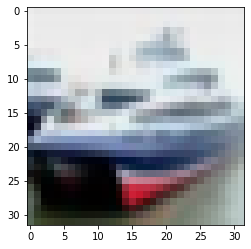

actual [8] predicted 8


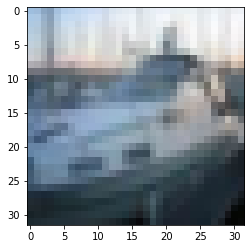

actual [8] predicted 8


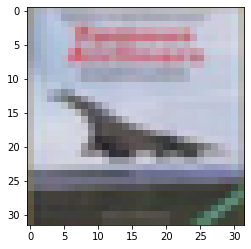

actual [0] predicted 0


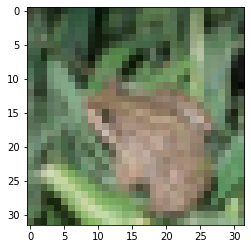

actual [6] predicted 6


In [44]:
import matplotlib.pyplot as plt
for i in range(1,5):
  plt.imshow(X_test[i,:,:])  
  plt.show()
  y=model.predict_classes(X_test[[i],:])
  print("actual",yp[i],"predicted",y[0])